In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[29.30867353]
-1.7616982724201955


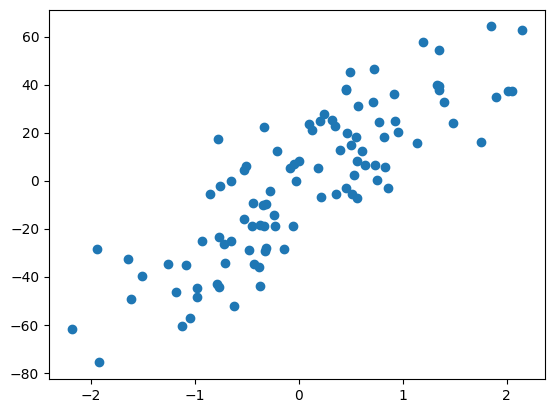

In [2]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
plt.scatter(x,y)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print(reg.coef_)
print(reg.intercept_)

C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+04, tolerance: 8.326e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the 

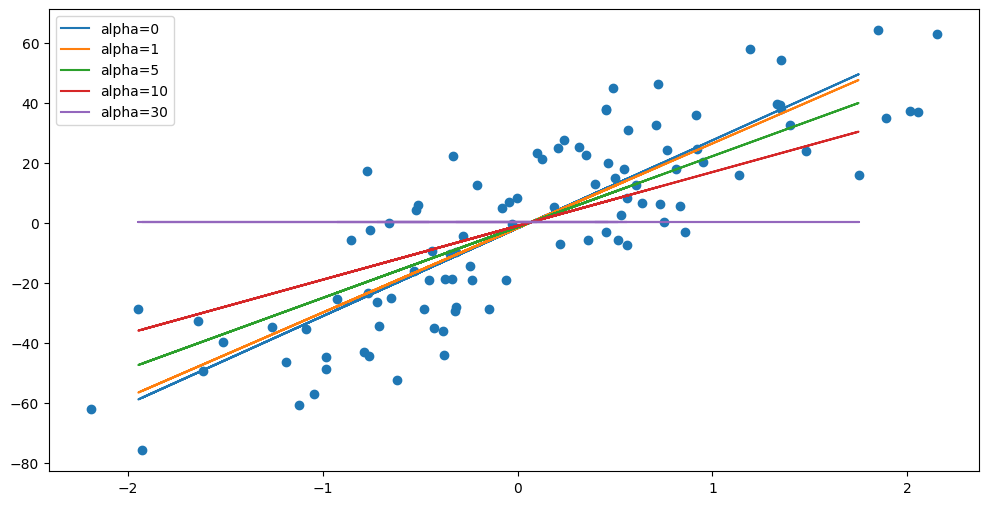

In [3]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(x,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(x_train,y_train)
    plt.plot(x_test,L.predict(x_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

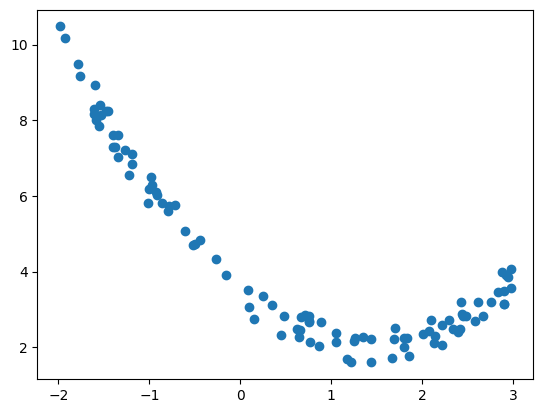

In [4]:
m = 100
x1 = 5*np.random.rand(m,1)-2
x2 = 0.7*x1**2-2*x1+3+np.random.rand(m,1)
plt.scatter(x1,x2)
plt.show()

C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.532e+00, tolerance: 5.594e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the 

AttributeError: Line2D.set() got an unexpected keyword argument 'preds'

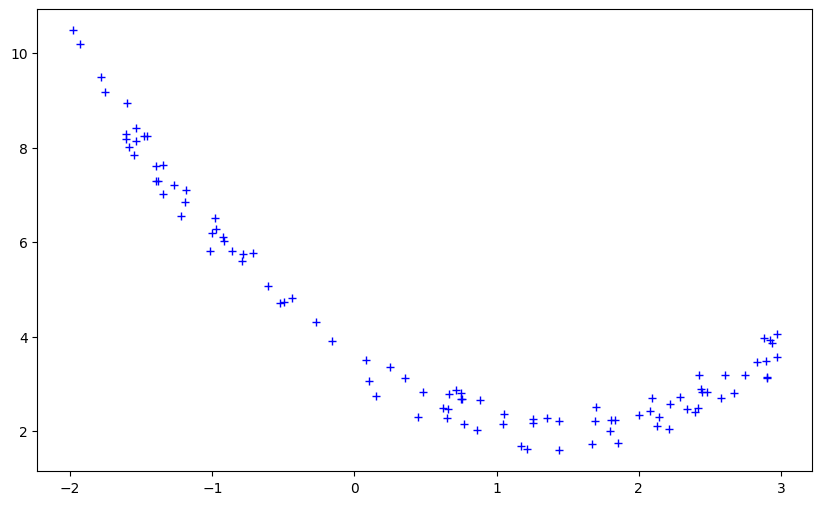

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
def get_preds_lasso(x1,x2,alpha):
    model = Pipeline([('poly_feats',PolynomialFeatures(degree=16)),('lasso',Lasso(alpha=alpha))])
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,0.1,1]
cs = ['r','g','b']
plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')
for alpha,c in zip(alphas,cs):
    preds = get_preds_lasso(x1,x2,alpha)
    plt.plot(sorted(x1[:,0]),preds=[np.argsort(x1[:,0])],color=c,label='Alpha: {}'.format(alpha))
plt.legend()
plt.show()

C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.513e+00, tolerance: 5.594e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the 

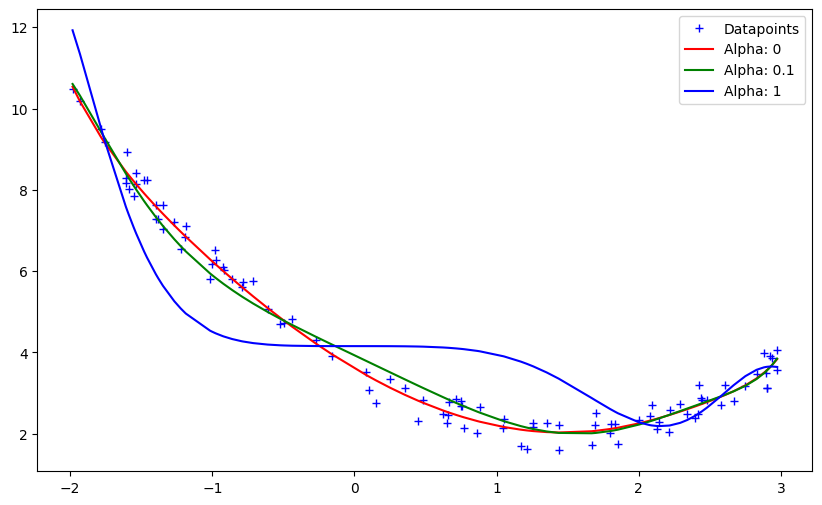

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso  # You used Lasso, not Ridge
import numpy as np
import matplotlib.pyplot as plt

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha, max_iter=10000))  # Add max_iter for convergence
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10,6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    sorted_idx = np.argsort(x1[:, 0])  # get indices that sort x1
    plt.plot(x1[sorted_idx, 0], preds[sorted_idx], color=c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()


In [10]:
#How are coefficients are affected?
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [11]:
data = load_diabetes()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['TARGET']=data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [12]:
x_train,x_test,y_train,y_test =  train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [14]:
coefs = []
r2_scores = []
for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)
    coefs.append(reg.coef_.tolist())
    y_pred=reg.predict(x_test)
    r2_scores.append(r2_score(y_test,y_pred))

C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shraddha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the 

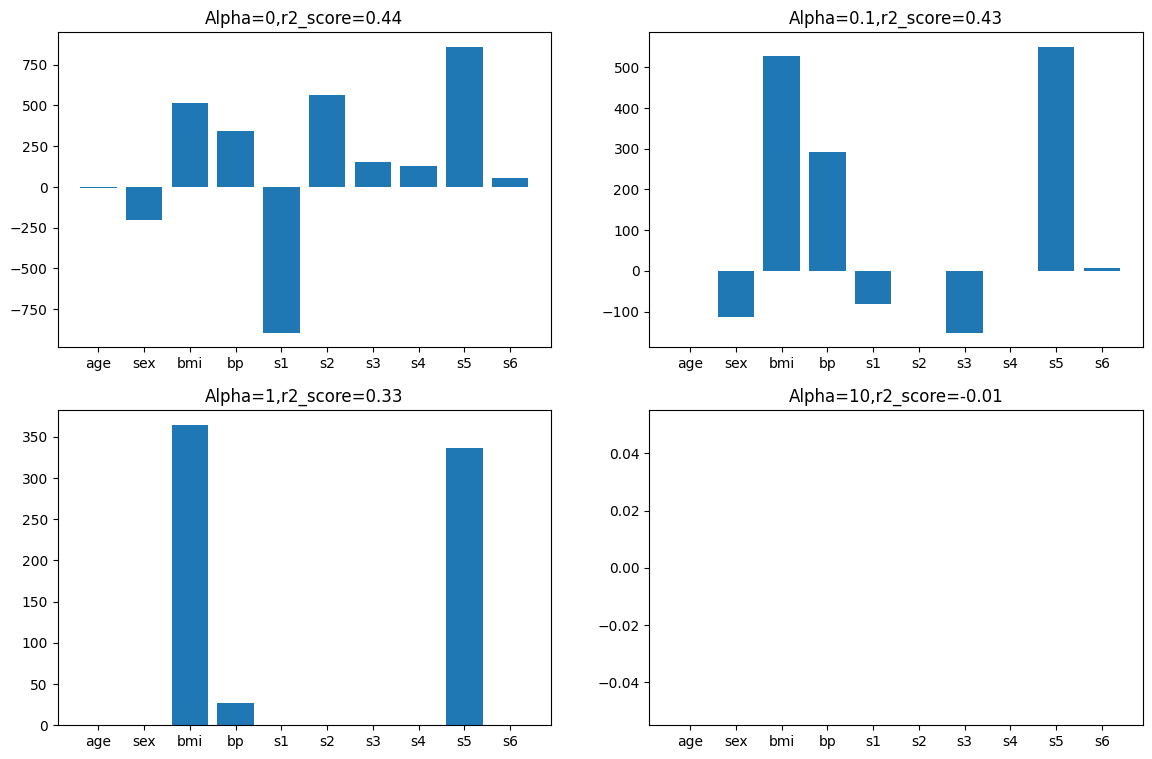

In [18]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha=0,r2_score={}'.format(round(r2_scores[0],2)))
plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha=0.1,r2_score={}'.format(round(r2_scores[1],2)))
plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha=1,r2_score={}'.format(round(r2_scores[2],2)))
plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha=10,r2_score={}'.format(round(r2_scores[3],2)))
plt.show()

In [19]:
#ElasticNet Regression

In [20]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [21]:
x,y = load_diabetes(return_X_y=True)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
#LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [24]:
#Ridge
reg = Ridge(alpha=0.1)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.45199494197195456

In [25]:
#Lasso
reg = Lasso(alpha=0.1)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.4334618007658305

In [26]:
#ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.4531474541554823